In [19]:
# 해외주식 주가 데이터 가져오기
import FinanceDataReader as fdr 
df_apple = fdr.DataReader(symbol='AAPL', start='2010') # 애플, 2010~현재
df_apple

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-01-04,7.64,7.62,7.66,7.58,493730000.0,0.0146
2010-01-05,7.66,7.66,7.70,7.62,601900000.0,0.0026
2010-01-06,7.53,7.66,7.69,7.53,552160000.0,-0.0170
2010-01-07,7.52,7.56,7.57,7.47,477130000.0,-0.0013
2010-01-08,7.57,7.51,7.57,7.47,447880000.0,0.0066
...,...,...,...,...,...,...
2022-10-11,138.98,139.90,141.35,138.22,77030000.0,-0.0103
2022-10-12,138.34,139.13,140.36,138.16,69830000.0,-0.0046
2022-10-13,142.99,134.99,143.59,134.37,112880000.0,0.0336


<AxesSubplot:xlabel='Date'>

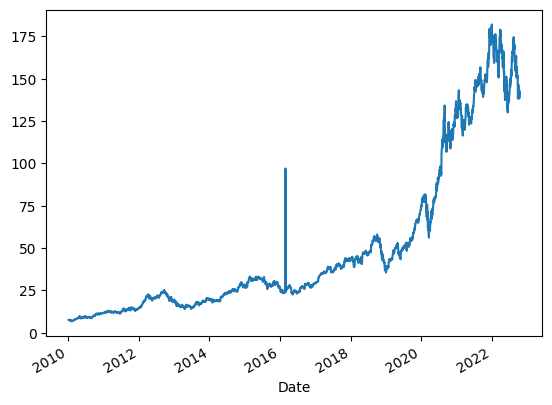

In [20]:
df_apple['Close'].plot()

In [27]:
df_apple['3MA']=df_apple['Close'].rolling(3).mean().shift(1)
df_apple

,Close,Open,High,Low,Volume,Change,3MA,Close_7Days_Mean
Date,,,,,,,,
2010-01-04,7.64,7.62,7.66,7.58,493730000.0,0.0146,NaN,NaN
2010-01-05,7.66,7.66,7.70,7.62,601900000.0,0.0026,NaN,NaN
2010-01-06,7.53,7.66,7.69,7.53,552160000.0,-0.0170,NaN,NaN
2010-01-07,7.52,7.56,7.57,7.47,477130000.0,-0.0013,7.610000,NaN
2010-01-08,7.57,7.51,7.57,7.47,447880000.0,0.0066,7.570000,NaN
...,...,...,...,...,...,...,...,...
2022-10-11,138.98,139.90,141.35,138.22,77030000.0,-0.0103,141.980000,142.838571
2022-10-12,138.34,139.13,140.36,138.16,69830000.0,-0.0046,139.830000,142.251429
2022-10-13,142.99,134.99,143.59,134.37,112880000.0,0.0336,139.246667,141.807143


Text(0.5, 1.0, 'Close Price for Apple')

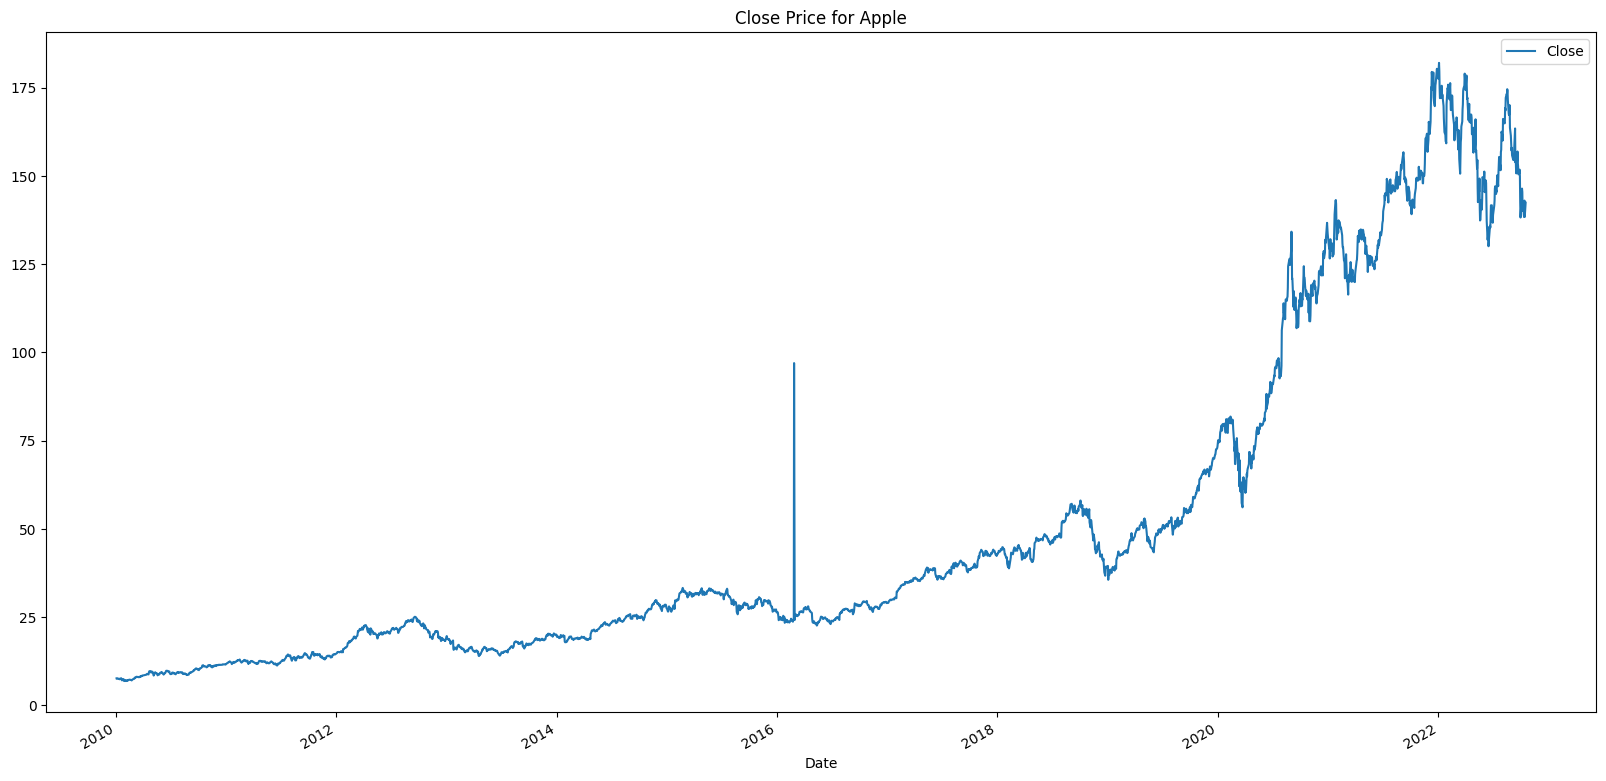

In [23]:
import matplotlib.pyplot as plt
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean']=df_apple["Close"].rolling(7).mean()
plt.title('Close Price for Apple')

<AxesSubplot:xlabel='index'>

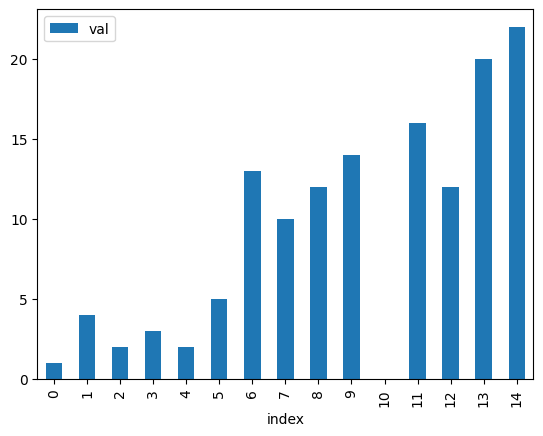

In [35]:
import pandas as pd
import numpy as np
data={'val':[1,4,2,3,2,5,13,10,12,14,np.nan,16,12,20,22]}
df=pd.DataFrame(data).reset_index()
df.plot(kind='bar', x='index', y='val')

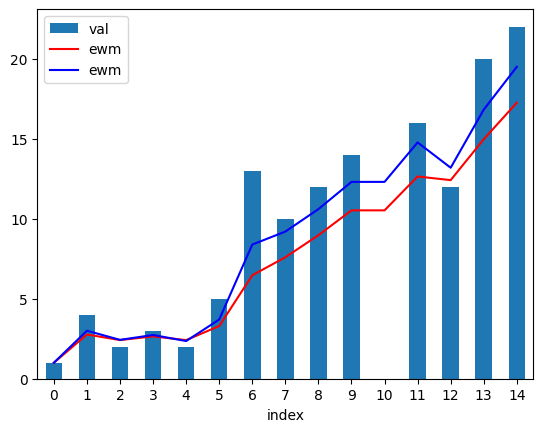

In [36]:
import matplotlib.pyplot as plt
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) #val열에 ewm 메서드 적용후 df에 추가
df3= df.assign(ewm=df['val'].ewm(alpha=0.5).mean())
ax=df.plot(kind='bar',x='index',y='val') #ax에 df의 bar chart 생성
ax2= df2.plot(kind='line',x='index',y='ewm',color='red',ax=ax) # ax2에 df2의 line chart 생성 후 ax에 추가
ax3 = df3.plot(kind='line',x='index',y='ewm',color='blue',ax=ax)
plt.show() # 그래프 출력